<a href="https://colab.research.google.com/github/vaidande/DogVsWolves-VGG16/blob/main/DogsVsWolves-VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves', 
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = True,
                                               subset = 'training')
test_data = val_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves',
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = 'categorical',
                                               shuffle = False,
                                               subset = 'validation')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) #+ [3]: No. of channels.(RGB)
                                                                                   #weights='imagnet': retrives the same weights which where used in the ImageNet competition.
                                                                                   #include_top=False: removes the default VGG16 input, Flatten and Output layer.

In [ ]:
#don't train existing weights.
for layer in vgg16.layers:
  layer.trainable = False #Not to update weights (as we are using ImageNet weights), we are freezing the VGG16 architecture.

In [ ]:
#flattening..
x = Flatten()(vgg16.output)

In [ ]:
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/*')

In [ ]:
#adding Dense layer..
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg16.input, outputs=prediction) #creating model object.. 
                                                      #inputs=vgg16.input specifies the input we created
                                                      #outputs=prediction specifies the output layer we created

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
metric = 'val_accuracy'
checkpoint = ModelCheckpoint("dogsvswolvdes.h5", monitor = metric, save_best_only=True, mode = 'auto', verbose = 1)

In [52]:
r = model.fit_generator(train_data,
                        validation_data = test_data,
                        epochs = 20, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
50/50 [==============================] - 39s 786ms/step - loss: 0.0769 - accuracy: 0.9775 - val_loss: 0.1781 - val_accuracy: 0.9350

Epoch 00001: val_accuracy improved from -inf to 0.93500, saving model to dogsvswolvdes.h5
Epoch 2/20
50/50 [==============================] - 40s 793ms/step - loss: 0.0731 - accuracy: 0.9775 - val_loss: 0.1570 - val_accuracy: 0.9450

Epoch 00002: val_accuracy improved from 0.93500 to 0.94500, saving model to dogsvswolvdes.h5
Epoch 3/20
50/50 [==============================] - 39s 788ms/step - loss: 0.0625 - accuracy: 0.9844 - val_loss: 0.1645 - val_accuracy: 0.9450

Epoch 00003: val_accuracy did not improve from 0.94500
Epoch 4/20
50/50 [==============================] - 39s 787ms/step - loss: 0.0556 - accuracy: 0.9850 - val_loss: 0.1834 - val_accuracy: 0.9425

Epoch 00004: val_accuracy did not improve from 0.94500
Epoch 5/20
50/50 [==============================] - 39s 787ms/step - loss: 0.0565 - accuracy: 0.9831 - val_loss: 0.1682 - val_accur

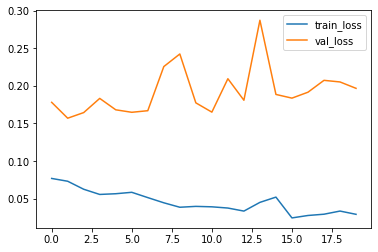

<Figure size 432x288 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

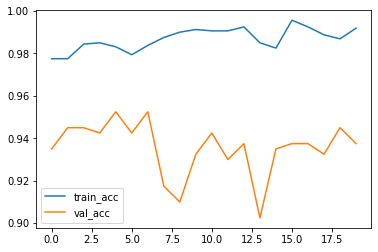

<Figure size 432x288 with 0 Axes>

In [54]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [57]:
from tensorflow.keras.models import load_model
model = load_model('dogsvswolvdes.h5')

In [66]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/DogsVsWolves/Eurasian_wolf_2.jpg',target_size=(224,224))

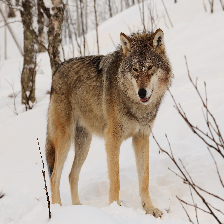

In [67]:
x

In [68]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [69]:
a=np.argmax(result, axis=1)

In [71]:
if a==1:
  print("Its a Wolf!")
else:
  print("Its a Dog!")

Its a Wolf!


In [73]:
x2=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/DogvsCat-8000-2000/dataset/single_prediction/pixie_grass.jpg',target_size=(224,224))

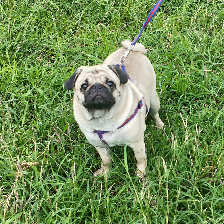

In [74]:
x2

In [75]:
test_img2 = image.img_to_array(x2)
test_img2 = test_img2/255
test_img2 = np.expand_dims(test_img2, axis = 0)
result2 = model.predict(test_img2)

In [76]:
a2=np.argmax(result2, axis=1)

In [79]:
if a2==1:
  print("Its a Wolf!")
else:
  print("Its a Dog!")

Its a Dog!
